<a href="https://colab.research.google.com/github/zackandcodingbypostmalone/plastic/blob/main/Curious.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
#@title
from matplotlib import pyplot as plt
!pip install geopandas
import pandas as pd
import geopandas as gpd
import numpy as np
import datetime

import plotly.express as px
import plotly.graph_objects as go

In [100]:
#@title
gdf = gpd.GeoDataFrame.from_file('https://docs.google.com/uc?id=1JXdn72Ur1fMMXCfksNqt5b-7JCD0-WAV&export=download')

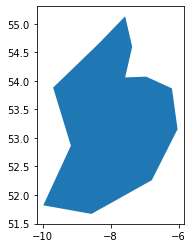

In [112]:
#this is me isolating crude-looking Ireland bc I can
mask = gdf['ADMIN'] == 'Ireland'
gdf[mask].plot()

In [104]:
#@title
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vSHo1FzmCpYdNRoMgBZSPTzxhHE-yI0bRohAvi0QetFhIF6MlZfpxGKXwyg5Zxm37jniEQWXC5Pm9O1/pub?output=csv')
df 

,Entity,Year,Plastic waste generated (% global total),Mismanaged waste (% global total),Mismanaged waste in 2025 (% global total)
0,Albania,2010,0.0640,0.0933,0.0913
1,Albania,2025,0.0913,NaN,NaN
2,Algeria,2010,0.8712,1.6347,1.4729
3,Algeria,2025,1.4729,NaN,NaN
4,Angola,2010,0.0864,0.1964,0.1980
...,...,...,...,...,...
367,Venezuela,2025,0.2233,NaN,NaN
368,Vietnam,2010,2.0969,5.7588,6.0407
369,Vietnam,2025,6.0407,NaN,NaN
370,Yemen,2010,0.2270,0.5310,0.7440


In [111]:
#@title
merged = gdf.merge(df, left_on='ADMIN', right_on='Entity')

merged = merged.loc[merged.Year == 2010,:]

fig = go.Figure(data=go.Choropleth(
    locations = merged['GU_A3'],
    z = merged['Plastic waste generated (% global total)'],
    text = merged['Entity'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = '%',
    colorbar_title = '% of Global Total',
))

fig.update_layout(
    title_text='Plastic Waste Generated By Country in 2010',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://github.com/owid/owid-datasets/blob/master/datasets/Plastic%20waste%20percentages%20-%20Jambeck%20et%20al.%20(2015)/README.md#plastic-waste-percentages---jambeck-et-al-2015.html">\
            GitHub</a>',
        showarrow = False
    )]
)

fig.show()


In [114]:
#@title
merged = gdf.merge(df, left_on='ADMIN', right_on='Entity')

merged = merged.loc[merged.Year == 2025,:]

fig = go.Figure(data=go.Choropleth(
    locations = merged['GU_A3'],
    z = merged['Plastic waste generated (% global total)'],
    text = merged['Entity'],
    colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
    colorbar_ticksuffix = '%',
    colorbar_title = '% of Global Total',
))

fig.update_layout(
    title_text='Projected Plastic Waste Generated By Country in 2025',
    geo=dict(
        showframe=False,
        showcoastlines=False,
        projection_type='equirectangular'
    ),
    annotations = [dict(
        x=0.55,
        y=0.1,
        xref='paper',
        yref='paper',
        text='Source: <a href="https://github.com/owid/owid-datasets/blob/master/datasets/Plastic%20waste%20percentages%20-%20Jambeck%20et%20al.%20(2015)/README.md#plastic-waste-percentages---jambeck-et-al-2015.html">\
            GitHub</a>',
        showarrow = False
    )]
)

fig.show()